In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from openai import OpenAI
import speech_recognition as sr
from datetime import datetime
from os import path, listdir, getcwd

In [2]:
r = sr.Recognizer()
times_by_ggl = {}
times_by_whisper = {}
transcription_by_ggl = {}
transcription_by_whisper = {}

# Get all audio files
folder_path = "/audio_files/audio-stimuli/"
folder_name = "3/"
final_path = getcwd() + folder_path + folder_name
audio_files = listdir(final_path)

In [3]:
def time_taken_google_speech(audio):
    start = datetime.now()
    # recognize speech using Google Speech Recognition
    try:
        text = r.recognize_google(audio)
        # print("Google Speech Recognition thinks you said " + r.recognize_google(audio))
    except sr.UnknownValueError:
        print("Google Speech Recognition could not understand audio")
    except sr.RequestError as e:
        print("Could not request results from Google Speech Recognition service; {0}".format(e))

    end = datetime.now()
    total_time = end - start
    return (total_time, text)

In [4]:
def time_taken_openAI_whisper(audio):
    start = datetime.now()
    try:
        text = r.recognize_whisper(audio)
        # print(r.recognize_whisper(audio))
    except sr.UnknownValueError:
        print("Did not understand")
    except sr.RequestError as e:
        print(e)
    end = datetime.now()
    total_time = end - start
    return (total_time, text)
    # return total_time

In [5]:
for audio_file in audio_files:
    print(audio_file)
    # AUDIO_FILE = path.join(path.dirname(path.realpath(__file__)), audio_file)
    audio_path = getcwd() + "/.." + folder_path + folder_name
    AUDIO_FILE = audio_path + audio_file

    # use the audio file as the audio source
    with sr.AudioFile(AUDIO_FILE) as source:
        audio = r.record(source)  # read the entire audio file
    print(f"Processing Audio file - {audio_file}")
    print()
    print("Time taken by Google Speech Recognition")
    tt_ggl, text_ggl = time_taken_google_speech(audio)
    tt_ggl = int(tt_ggl.total_seconds() * 1e6)
    print(tt_ggl)
    times_by_ggl[audio_file] = tt_ggl
    transcription_by_ggl[audio_file] = text_ggl

    print("Time taken by OpenAI Whisper")
    tt_whisper, text_whisper = time_taken_google_speech(audio)
    tt_whisper = int(tt_whisper.total_seconds() * 1e6)
    print(tt_whisper)
    times_by_whisper[audio_file] = tt_whisper
    transcription_by_whisper[audio_file] = text_whisper
    print()

3.4.wav
Processing Audio file - 3.4.wav

Time taken by Google Speech Recognition
503291
Time taken by OpenAI Whisper
482472

3.5.wav
Processing Audio file - 3.5.wav

Time taken by Google Speech Recognition
575398
Time taken by OpenAI Whisper
516707

3.7.wav
Processing Audio file - 3.7.wav

Time taken by Google Speech Recognition
509818
Time taken by OpenAI Whisper
448055

3.6.wav
Processing Audio file - 3.6.wav

Time taken by Google Speech Recognition
534084
Time taken by OpenAI Whisper
500750

3.2.wav
Processing Audio file - 3.2.wav

Time taken by Google Speech Recognition
455690
Time taken by OpenAI Whisper
464857

3.3.wav
Processing Audio file - 3.3.wav

Time taken by Google Speech Recognition
520297
Time taken by OpenAI Whisper
485596

3.1.wav
Processing Audio file - 3.1.wav

Time taken by Google Speech Recognition
445637
Time taken by OpenAI Whisper
559646

3.8.wav
Processing Audio file - 3.8.wav

Time taken by Google Speech Recognition
511152
Time taken by OpenAI Whisper
502586



In [6]:
total_times_ggl = 0
total_times_whisper = 0

print("Total times taken by Google Speech Recognition")
for k in times_by_ggl:
    print(k, times_by_ggl[k])
    t = times_by_ggl[k]
    total_times_ggl += t
print()

print("Total times taken by OpenAI Whisper")
for k in times_by_whisper:
    print(k, times_by_whisper[k])
    t = times_by_whisper[k]
    total_times_whisper += t
print()


print(f'Total time taken by Google Speech Recognition to process {len(audio_files)} audio files is {str(total_times_ggl)[0: len(str(total_times_ggl)) - 6]}.{str(total_times_ggl)[len(str(total_times_ggl)) - 6: ]} seconds')
print(f'Total time taken by OpenAI Whisper to process {len(audio_files)} audio files is {str(total_times_whisper)[0: len(str(total_times_whisper)) - 6]}.{str(total_times_whisper)[len(str(total_times_whisper)) - 6: ]} seconds')

Total times taken by Google Speech Recognition
3.4.wav 503291
3.5.wav 575398
3.7.wav 509818
3.6.wav 534084
3.2.wav 455690
3.3.wav 520297
3.1.wav 445637
3.8.wav 511152
3.9.wav 497216
3.10.wav 503491

Total times taken by OpenAI Whisper
3.4.wav 482472
3.5.wav 516707
3.7.wav 448055
3.6.wav 500750
3.2.wav 464857
3.3.wav 485596
3.1.wav 559646
3.8.wav 502586
3.9.wav 465502
3.10.wav 485423

Total time taken by Google Speech Recognition to process 10 audio files is 5.056074 seconds
Total time taken by OpenAI Whisper to process 10 audio files is 4.911594 seconds


In [7]:
times_by_ggl_sorted = {k: v for (k, v) in sorted(times_by_ggl.items(), key = lambda x: x[0])}
transcription_by_ggl_sorted = {k: v for (k, v) in sorted(transcription_by_ggl.items(), key = lambda x: x[0])}

times_by_whisper_sorted = {k: v for (k, v) in sorted(times_by_whisper.items(), key = lambda x: x[0])}
transcription_by_whisper_sorted = {k: v for (k, v) in sorted(transcription_by_whisper.items(), key = lambda x: x[0])}

In [8]:
whisper_df = pd.DataFrame(list(zip(times_by_whisper_sorted.keys(), times_by_whisper_sorted.values(), transcription_by_whisper_sorted.values())))
whisper_df.columns = ['File Name', 'Time to Convert', 'Transcribed Text']
whisper_df

,File Name,Time to Convert,Transcribed Text
0,3.1.wav,559646,close the door
1,3.10.wav,485423,you're losing me
2,3.2.wav,464857,don't do that
3,3.3.wav,485596,how are
4,3.4.wav,482472,how's it going
5,3.5.wav,516707,I don't agree
6,3.6.wav,500750,please get me
7,3.7.wav,448055,please repeat that
8,3.8.wav,502586,what's going on
9,3.9.wav,465502,why don't you


In [9]:
ggl_df = pd.DataFrame(list(zip(times_by_ggl_sorted.keys(), times_by_ggl_sorted.values(), transcription_by_ggl_sorted.values())))
ggl_df.columns = ['File Name', 'Time to Convert', 'Transcribed Text']
ggl_df

,File Name,Time to Convert,Transcribed Text
0,3.1.wav,445637,close the door
1,3.10.wav,503491,you're losing me
2,3.2.wav,455690,don't do that
3,3.3.wav,520297,how are
4,3.4.wav,503291,how's it going
5,3.5.wav,575398,I don't agree
6,3.6.wav,534084,please get me
7,3.7.wav,509818,please repeat that
8,3.8.wav,511152,what's going on
9,3.9.wav,497216,why don't you


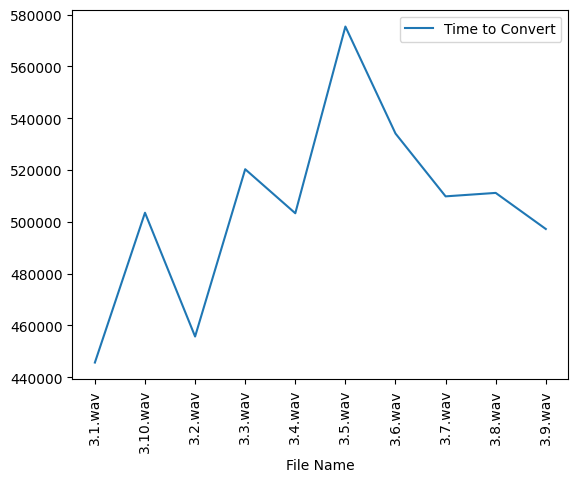

In [10]:
ggl_plot = ggl_df.plot.line(x='File Name', y='Time to Convert')
ggl_plot.set_xticks(np.arange(len(times_by_ggl_sorted)))
ggl_plot.set_xticklabels(ggl_df['File Name'])
ggl_plot.tick_params(axis='x', labelrotation=90)

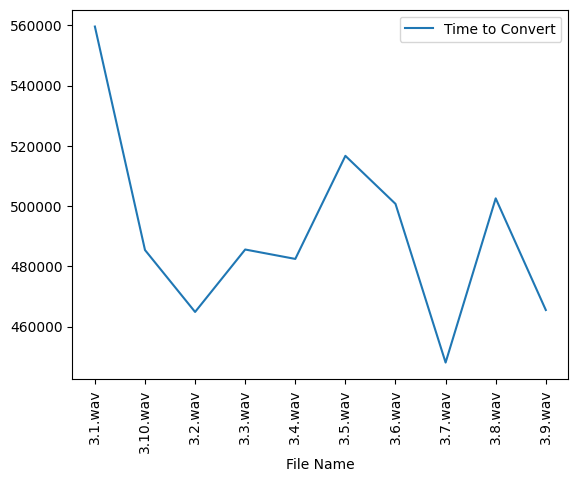

In [11]:
whisper_plot = whisper_df.plot.line(x='File Name', y='Time to Convert')
whisper_plot.set_xticks(np.arange(len(times_by_whisper_sorted)))
whisper_plot.set_xticklabels(whisper_df['File Name'])
whisper_plot.tick_params(axis='x', labelrotation=90)